<a href="https://colab.research.google.com/github/Baldezo313/Some-real-world-machine-learning-project/blob/main/PROJET_11_COMBINAISON_DES_TECHNIQUES_DE_CLUSTERING_ET_D%E2%80%99ACP_POUR_LA_SEGMENTATION_DE_CLIENTELE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET 11 : COMBINAISON DES TECHNIQUES DE CLUSTERING ET D’ACP POUR LA SEGMENTATION DE CLIENTELE  

La segmentation de la clientèle d'une entreprise est une pratique de division des clients en groupes d'individus ayant les mêmes caractéristiques. Cette stratégie permet de comprendre le comportement des clients, sur la base de leurs données historiques, et donc d'utiliser efficacement les ressources allouées au Marketing. La segmentation est effectuée par une
technique d'apprentissage automatique non supervisée appelée Clustering. L'algorithme de clustering le plus populaire est KMeans. Dans ce projet, nous montrerons comment utiliser cet
algorithme pour segmenter les clients d'une entreprise. Nous montrerons également comment combiner KMeans et l'Analyse en Composantes Principales afin d'améliorer la qualité de la
segmentation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Baldezo313/Some-real-world-machine-learning-project/refs/heads/main/Machine-Learning-par-la-pratique-avec-Python-master/segmentation%20data.csv?token=GHSAT0AAAAAAC4VKTEQ4DAQXSZUM2YQ24VMZ4N7XYA',
                 index_col=0)

df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
# Dimension des données
print('La dataframe contient', df.shape[0],
      'ligne (chaque ligne représente un client) et',
      df.shape[1], 'colonnes')

La dataframe contient 2000 ligne (chaque ligne représente un client) et 7 colonnes


### DESCRIPTION DE CHAQUE VARIABLE  

* *Sex*  
1: Female, 0: Male   
* *Education*  
0: other/unknown, 1: high-school, 2:university, 3:graduate school  
* *Occupation*  
0: unemployed, 1: skilled, 2: highly qualified  
* *settlement size*  
0: small, 1: mid-sized, 2:big  


In [5]:
# Données manquantes
df.isna().sum()

,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


Il n'y a pas de valeurs manquantes dans les données.  




* Vérifions que les formats de stockage des valeurs au niveau de chaque variable :

In [6]:
df.dtypes

,0
Sex,int64
Marital status,int64
Age,int64
Education,int64
Income,int64
Occupation,int64
Settlement size,int64


Les valeurs sont stockées dans le bon format.

### ANALYSE EXPLORATOIRE DES DONNEES

In [7]:
# Résumé statistique
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


L'âge est compris entre 18 et 76 ans. L'âge médian est de 33 ans. Le revenu est compris entre 35832 et 309364 dollars. Le revenu médian est de 115548,5 $.

<ipython-input-8-753d9214c2f9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


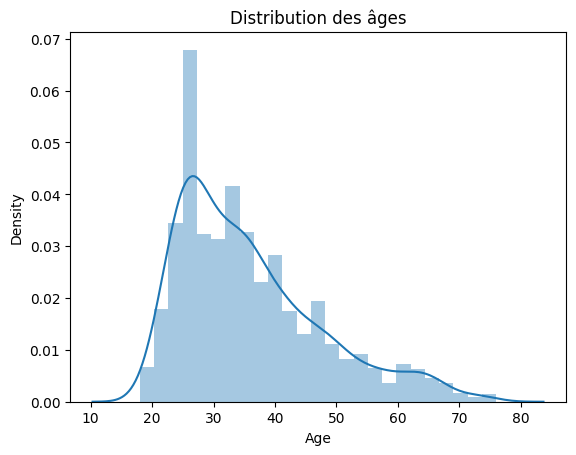

In [8]:
# Distribution de la variable 'Age'
sns.distplot(df["Age"])
plt.title('Distribution des âges')
plt.show()

<ipython-input-9-38fe4c2fffb0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income"])


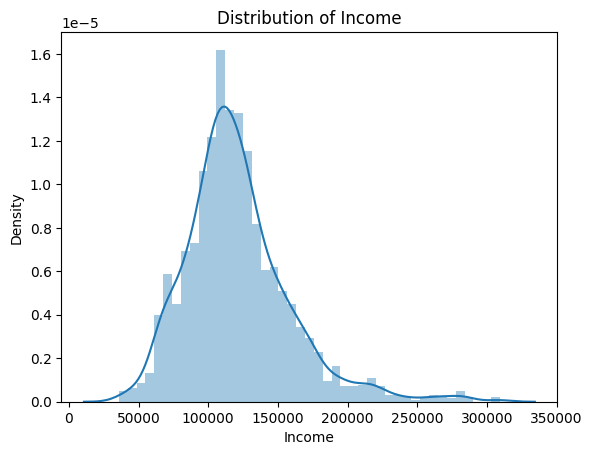

In [9]:
# Distribution de la variable 'Income'
sns.distplot(df["Income"])
plt.title('Distribution of Income')
plt.show()

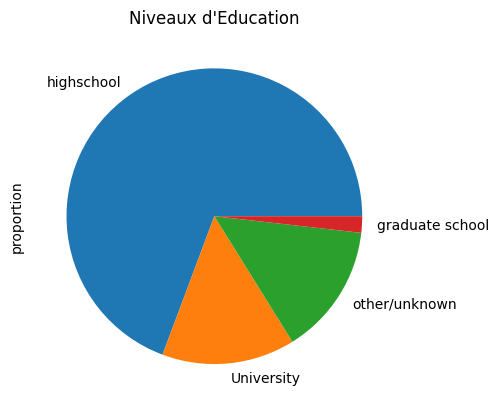

In [10]:
# Education
df["Education"].replace({0:'other/unknown',
                         1:'highschool',
                         2:'University',
                         3:'graduate school'}
                        ).value_counts(normalize=True).plot(kind='pie')
plt.title("Niveaux d'Education")
plt.show()

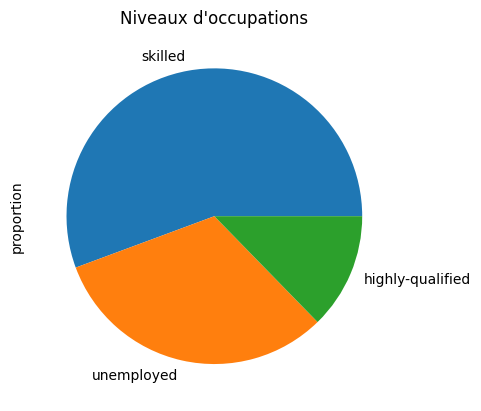

In [11]:
# Occupation
df["Occupation"].replace({0:'unemployed',
                          1:'skilled',
                          2:'highly-qualified'}).value_counts(normalize=True).plot(kind='pie')
plt.title("Niveaux d'occupations")
plt.show()

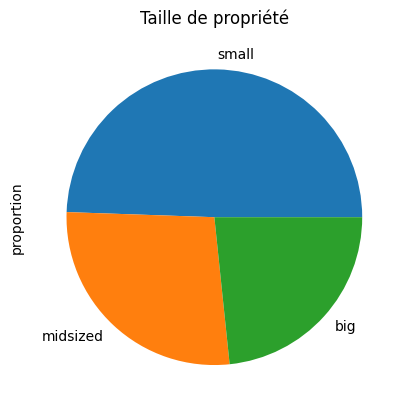

In [12]:
# Settlement size
df["Settlement size"].replace({0:'small',
                               1:'midsized',
                               2:'big'}).value_counts(normalize=True).plot(kind='pie')
plt.title('Taille de propriété')
plt.show()

* Visualisons à présent les corrélations entre variables :

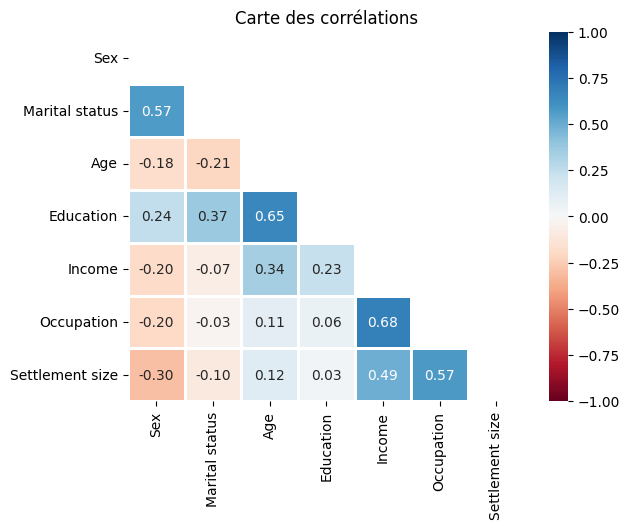

In [13]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Carte des corrélations')
plt.show()

### SEGMENTATION AVEC KMEANS  


In [14]:
# Standardisation des données
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

Afin de trouver le meilleur nombre de cluster par la méthode du coude, nous allons exécuter l'algorithme pour k allant de 1 à 10. De plus, nous choisirons KMeans++ comme méthode d'initialisation.41 En effet KMeans++ sélectionne de manière intelligente les centres de cluster initiaux pour le clustering afin d'accélérer la convergence de l'algorithme.  

WCSS est la somme des carrés des distances de chaque point de données dans tous les clusters
à leurs centres de gravité respectifs. L'idée est de pouvoir minimiser cette somme (Inertie du
système).

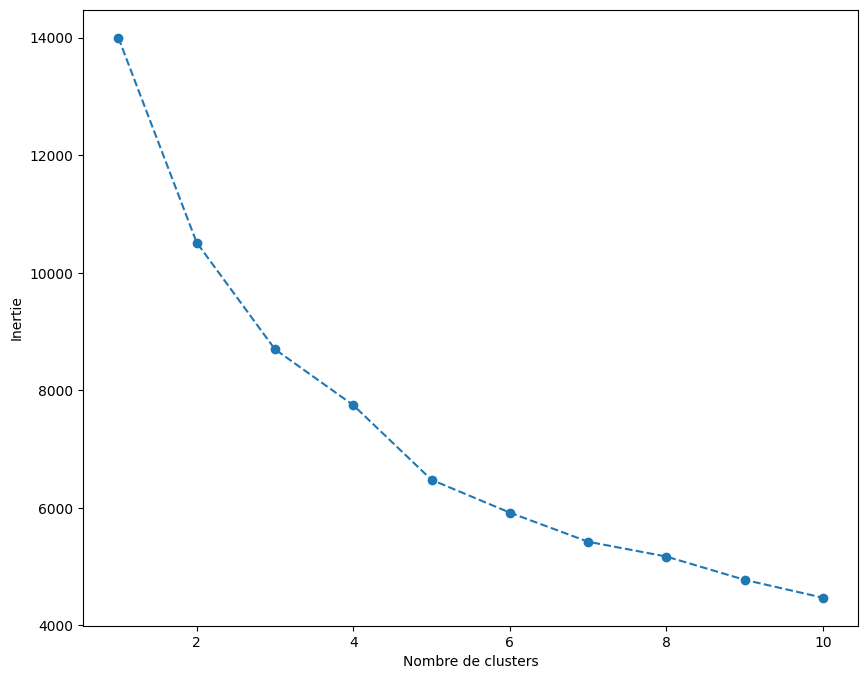

In [15]:
# Clustering
seed = 111
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = seed)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

# Méthode du coude pour le choix du nombre de clusters
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

Nous choisirons 4 comme nombre de clusters. Exécutons à nouveau KMeans pour cette valeur fixe de k.

In [16]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = seed)
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=111)

Il est temps d'explorer les résultats de notre segmentation. Tout d'abord, créons un nouveau bloc de données avec les entités d'origine et ajoutons une nouvelle colonne avec les clusters attribués pour chaque point.

In [17]:
df_segm_kmeans = df.copy()
df_segm_kmeans['Cluster'] = kmeans.labels_
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,2
100000004,0,0,45,1,171565,1,1,0
100000005,0,0,53,1,149031,1,1,0


In [18]:
# Centroïde de chaque cluster
centroid = df_segm_kmeans.groupby(['Cluster']).mean()
centroid

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.008180,0.000000,41.591002,0.922290,148655.815951,1.286299,1.531697
1,0.879076,0.809783,31.235054,1.107337,100000.059783,0.483696,0.160326
2,0.085106,0.000000,34.739362,0.553191,100325.478723,0.412234,0.172872
3,0.578947,0.994987,38.669173,1.508772,145097.042607,1.205514,1.368421


Sur la base des caractéristiques de chaque centroïde, l'équipe Marketing peut attribuer un nom à chaque groupe de clients. Par exemple, nous remarquons que :  
* Le premier groupe (cluster 0) concerne les clients qui ont en moyenne 41 ans (les plus âgés), un diplôme universitaire, un emploi de direction, les revenus les plus élevés et qui vivent dans des villes de taille moyenne. On peut donc dire que c'est le groupe des personnes aisées.  
* Le deuxième groupe (cluster 1) concerne les clients qui ont une moyenne d'âge de 31 ans, qui n'ont pas de diplôme d'études secondaires, sont au chômage, aux revenus les plus faibles et vivent dans les petites villes. Ce groupe est tout le contraire du cluster 0. On peut donc dire que c'est le groupe de personnes ayant le moins d'opportunités.  



Visualisons les clusters :

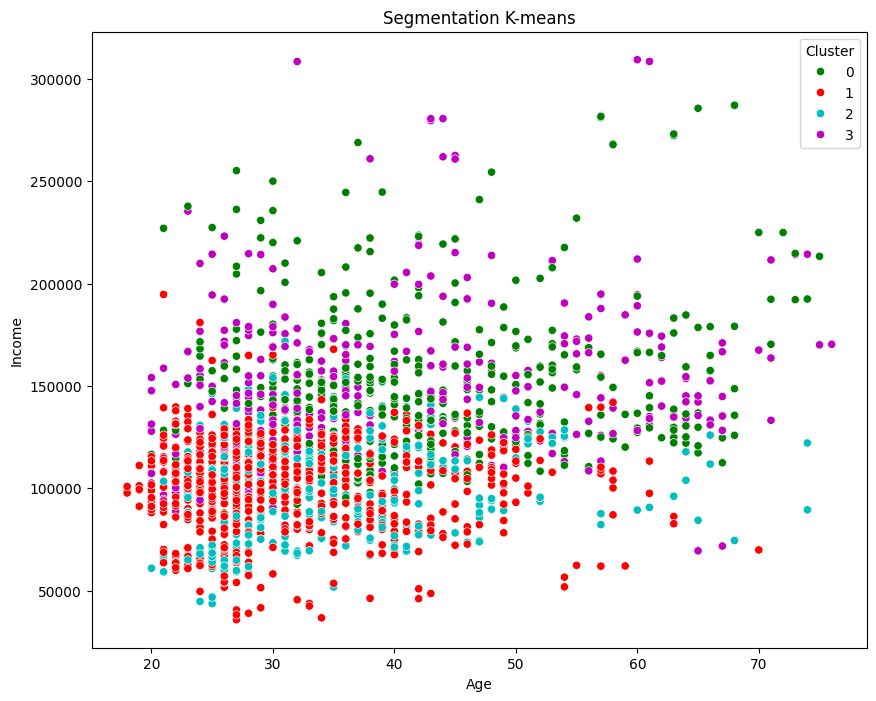

In [20]:
# Chaque point de notre ensemble de données est tracé avec la
# couleur du cluster auquel il a été attribué.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
hue = df_segm_kmeans['Cluster']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = hue, palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

Comme vous le voyez bien sur le graphique, les points sont très mélangés et on ne distingue pas bien chaque cluster. Dans la section suivante, nous essaierons d'améliorer notre segmentation en combinant Analyse en Composantes Principales et KMeans.

### SEGMENTATION AVEC ACP + KMEANS

In [21]:
# Création d'un modèle PCA (Principal Component Analysis)
pca = PCA()

# Ajustement du modèle PCA aux données standardisées
pca.fit(df_std)

# Variance expliquée par chaque composante
print(pca.explained_variance_ratio_)

[0.35696328 0.26250923 0.18821114 0.0755775  0.05716512 0.03954794
 0.02002579]


Par défaut, le nombre de composantes dans l'algorithme d'ACP est égal au nombre de variables de la dataframe originelle. Traçons un graphique de la variance cumulée expliquée en fonction du nombre total de composantes. Notre objectif est de garder 80% de toute la variance.

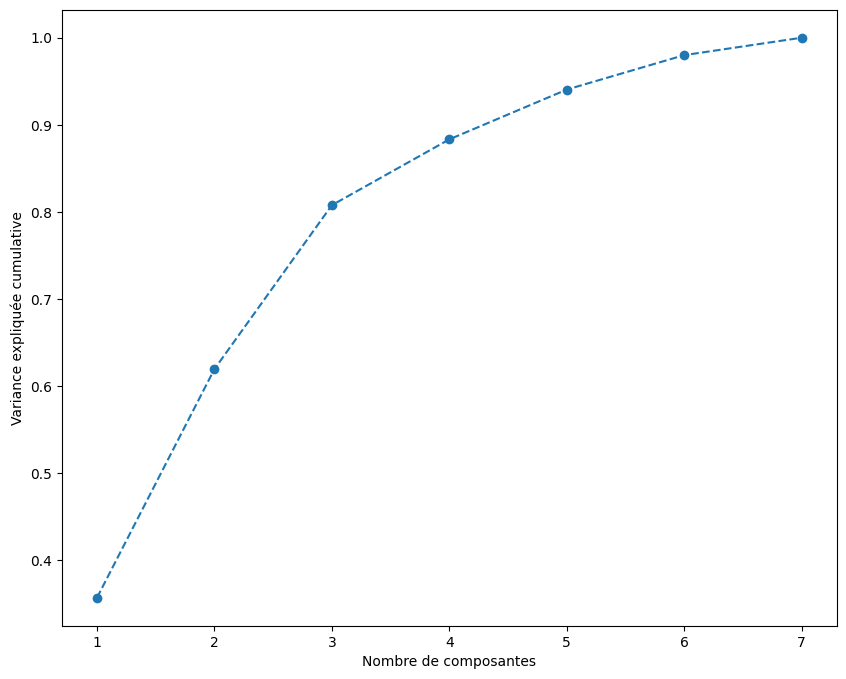

In [22]:
plt.figure(figsize = (10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulative')
plt.show()

Selon le graphique précédent, les trois premières composantes expliquent 80% de la variance.

In [23]:
# ACP avec 3 composantes
pca3 = PCA(n_components = 3)
pca3.fit(df_std)

df_pca3_comp = pd.DataFrame(data = pca3.components_,
                            columns = df.columns.values,
                            index = ['Component 1', 'Component2', 'Component 3'])
df_pca3_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


* Nous pouvons maintenant refaire une segmentation avec les données transformées par l'ACP.

In [24]:
scores_pca3 = pca3.transform(df_std)
wcss = []
for i in range(1,11):
  kmeans_pca3 = KMeans(n_clusters = i, init = 'k-means++',   random_state = seed)
  kmeans_pca3.fit(scores_pca3)
  wcss.append(kmeans_pca3.inertia_)

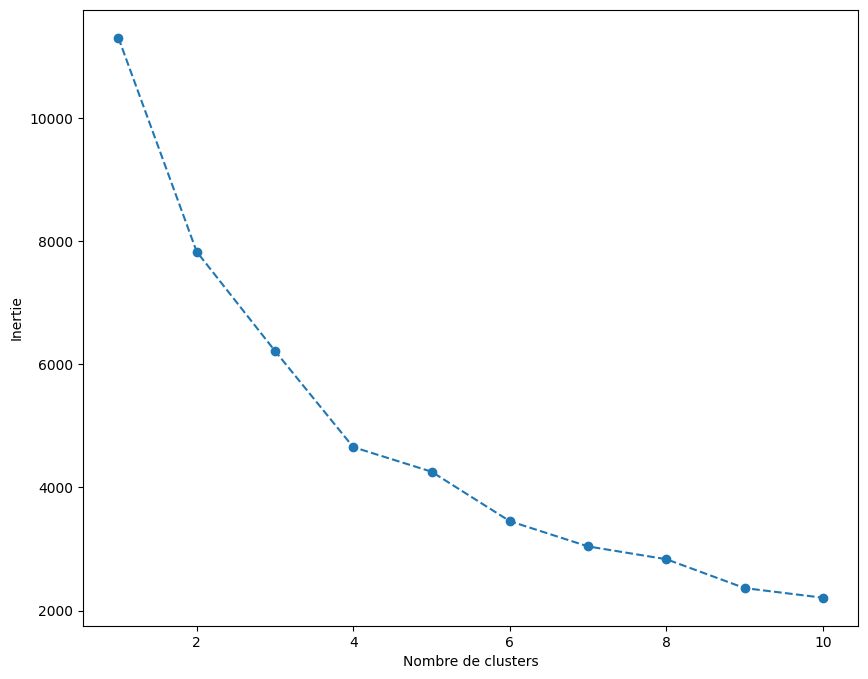

In [25]:
# Méthode du coude pour le choix du nombre de clusters
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

Selon la méthode du coude, nous choisissons 4 comme nombre de clusters.

In [26]:
kmeans_pca3 = KMeans(n_clusters = 4, init = 'k-means++', random_state = seed)
kmeans_pca3.fit(scores_pca3)

# Création d'une dataframe avec les variables d'origines,
# les composantes et les étiquettes de clusters
df_segm_pca3_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca3)], axis = 1)
df_segm_pca3_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca3_kmeans['Cluster PCA'] = kmeans_pca3.labels_
df_segm_pca3_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Cluster PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,0
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,0


In [27]:
# Centroïdes
centroid_pca3 = df_segm_pca3_kmeans.groupby(['Cluster PCA']).mean()
centroid_pca3

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Cluster PCA,,,,,,,,,,
0,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063
1,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678
2,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763
3,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641


* Visualisons les clusters :

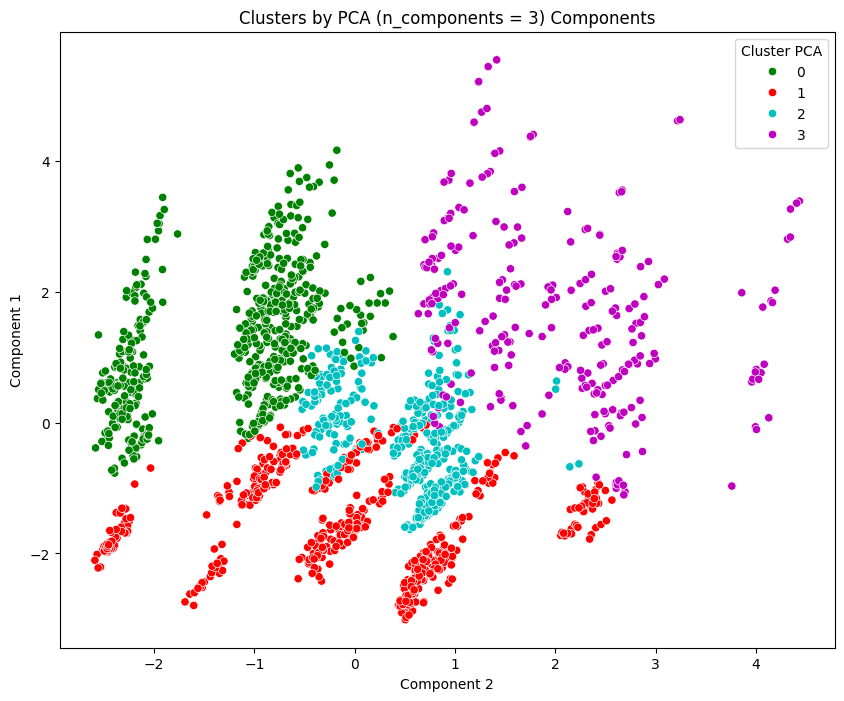

In [28]:
x_axis = df_segm_pca3_kmeans['Component 2']
y_axis = df_segm_pca3_kmeans['Component 1']
hue = df_segm_pca3_kmeans['Cluster PCA']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = hue, palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA (n_components = 3) Components')
plt.show()

Les points sont mieux regroupés au niveau de chaque cluster ce qui permet de mieux distinguer chaque cluster. Cette segmentation est meilleure que la première faite avec uniquement
l'algorithme KMeans.

## CONCLUSION
La segmentation des clients est très importante pour toute entreprise et permet d'analyser le
comportement des clients. L'algorithme K-means combiné avec PCA est un outil puissant et
facile à utiliser pour effectuer une bonne segmentation. Il peut également être utilisé dans des
domaines tels que la santé, la recherche scientifique, etc.